# Jupyter Notebook

This is a Jupyter Notebook, which is a basically just a super fancy Python shell.

You may have "cells" that can either be text (like this one) or executable Python code. Notebooks are really nice because they allow you to rapidly develop Python code by writing small bits of code, testing their output, and moving on to the next bit; this interactive nature of the notebook is a huge plus to professional Python developers. 

It's also nice, because it's really easy to share your code with others and surround it with text to tell a story! 

# Colaboratory
Colaboratory is a service provided by Google to take a Jupyter Notebook (a standard formay of a `.ipynb` file) and let users edit/run the code in the notebook for free! 

This notebook is write-protected so you are not able to edit the  notebook that the whole class will look at, but you are able to open up the notebook in "playground mode" which lets you make edits to a temporary copy of the notebook. If you want to save the changes you made to this notebook, you will have to follow the instructions when you try to save to copy the notebook to your Google Drive. 

# Setup
Make sure you run the following cell(s) before trying to run any the following cells. You do not need to understand what they are doing, it's just a way to make sure there is a file we want to use stored on the computer running this notebook.


In [ ]:
import requests

def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/04-15/bicycles.csv', 'bicycles.csv')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/04-15/fmri.csv', 'fmri.csv')

In [ ]:
import pandas as pd

# For plotting stuff later
import seaborn as sns
sns.set()

%matplotlib inline

# Missing Data
We started by looking at an fMRI datset that had some missing data 

In [ ]:
data = pd.read_csv('fmri.csv')
data

,subject,timepoint,event,region,signal
0,s13,18.0,stim,parietal,-0.017552
1,s5,14.0,NaN,parietal,-0.080883
2,s12,18.0,stim,parietal,-0.081033
3,s11,18.0,stim,parietal,-0.046134
4,s10,18.0,stim,parietal,-0.037970
5,NaN,18.0,stim,parietal,-0.103513
6,s8,18.0,stim,parietal,-0.064408
7,s7,18.0,stim,parietal,-0.060526
8,s6,18.0,stim,parietal,-0.007029
9,s5,18.0,stim,parietal,-0.040557


We saw that a libary called `numpy` provides this missing value `pandas` uses for missing data called; Not a Number (NaN). NaN operates by two rules
1. Any arithmetic operation on NaN, returns NaN
2. Any boolean operation on NaN, returns false

In [ ]:
import numpy as np
np.nan

nan

In [ ]:
1 + np.nan

nan

In [ ]:
np.nan * 1

nan

Note that NaN is different than None, which does not allow numerical operations

In [ ]:
None * 1

TypeError: ignored

In [ ]:
1 == np.nan

False

In [ ]:
np.nan == np.nan

False

Given this, we would expect that computing the mean of a column that has NaN entries would result in NaN, but pandas actually skips them for you! It's a very common situation to have missing data, so they default to skipping it.

In [ ]:
data['signal'].mean()

0.004274786661105509

Pandas also provides functions to help you detect, remove, or change missing values

In [ ]:
data[data['signal'].notnull()]

,subject,timepoint,event,region,signal
0,s13,18.0,stim,parietal,-0.017552
1,s5,14.0,NaN,parietal,-0.080883
2,s12,18.0,stim,parietal,-0.081033
3,s11,18.0,stim,parietal,-0.046134
4,s10,18.0,stim,parietal,-0.037970
5,NaN,18.0,stim,parietal,-0.103513
6,s8,18.0,stim,parietal,-0.064408
7,s7,18.0,stim,parietal,-0.060526
8,s6,18.0,stim,parietal,-0.007029
9,s5,18.0,stim,parietal,-0.040557


In [ ]:
data.dropna()

,subject,timepoint,event,region,signal
0,s13,18.0,stim,parietal,-0.017552
2,s12,18.0,stim,parietal,-0.081033
3,s11,18.0,stim,parietal,-0.046134
4,s10,18.0,stim,parietal,-0.037970
6,s8,18.0,stim,parietal,-0.064408
7,s7,18.0,stim,parietal,-0.060526
8,s6,18.0,stim,parietal,-0.007029
9,s5,18.0,stim,parietal,-0.040557
10,s4,18.0,stim,parietal,-0.048812
13,s1,18.0,stim,parietal,-0.046659


In [ ]:
data['signal'] = data['signal'].fillna(0)
data

,subject,timepoint,event,region,signal
0,s13,18.0,stim,parietal,-0.017552
1,s5,14.0,NaN,parietal,-0.080883
2,s12,18.0,stim,parietal,-0.081033
3,s11,18.0,stim,parietal,-0.046134
4,s10,18.0,stim,parietal,-0.037970
5,NaN,18.0,stim,parietal,-0.103513
6,s8,18.0,stim,parietal,-0.064408
7,s7,18.0,stim,parietal,-0.060526
8,s6,18.0,stim,parietal,-0.007029
9,s5,18.0,stim,parietal,-0.040557


# Sorting

In [ ]:
data.sort_values('signal')

,subject,timepoint,event,region,signal
97,s1,12.0,stim,parietal,-0.255486
83,s1,13.0,stim,parietal,-0.224351
571,s4,8.0,cue,parietal,-0.181241
87,s11,12.0,NaN,parietal,-0.178510
923,NaN,10.0,cue,parietal,-0.176453
69,s1,14.0,stim,NaN,-0.169312
1055,s4,8.0,cue,frontal,-0.160821
416,s11,10.0,stim,frontal,-0.159772
440,s6,12.0,stim,frontal,-0.155546
430,s11,11.0,stim,frontal,-0.154564


In [ ]:
data.nlargest(10, 'signal')

,subject,timepoint,event,region,signal
171,s1,6.0,stim,parietal,0.564985
166,s1,7.0,stim,parietal,0.494787
195,s1,5.0,stim,parietal,0.476055
192,s4,5.0,stim,parietal,0.460896
339,s4,5.0,stim,frontal,0.455575
353,s4,6.0,stim,frontal,0.410661
174,NaN,NaN,stim,parietal,0.405840
164,s3,7.0,stim,parietal,0.390466
188,s9,5.0,stim,parietal,0.381495
207,s4,4.0,NaN,parietal,0.346775


# Time Series

In [ ]:
data = pd.read_csv('bicycles.csv', index_col='Date', parse_dates=True)
data = data.sort_index()  # want to sort fronm earliest -> latest
data.head()

,East,West
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


Now when we look at the index (below), it has data type (dtype) `datetime64`

In [ ]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2019-03-31 14:00:00', '2019-03-31 15:00:00',
               '2019-03-31 16:00:00', '2019-03-31 17:00:00',
               '2019-03-31 18:00:00', '2019-03-31 19:00:00',
               '2019-03-31 20:00:00', '2019-03-31 21:00:00',
               '2019-03-31 22:00:00', '2019-03-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=56904, freq=None)

You can also look at the types of all the columns

In [ ]:
data.dtypes

East    float64
West    float64
dtype: object

Now that the date is the index, we use that to locate a row

In [ ]:
data.loc['2019-03-31 15:00:00']

East    130.0
West    121.0
Name: 2019-03-31 15:00:00, dtype: float64

The incredibly powerful thing about using datetime as the index type is it allows us to do semantic indexing based on dates and times. Here are some examples.

In [ ]:
data.loc['2017-03-31']

,East,West
Date,,
2017-03-31 00:00:00,2.0,4.0
2017-03-31 01:00:00,2.0,0.0
2017-03-31 02:00:00,1.0,0.0
2017-03-31 03:00:00,1.0,0.0
2017-03-31 04:00:00,3.0,3.0
2017-03-31 05:00:00,23.0,14.0
2017-03-31 06:00:00,57.0,49.0
2017-03-31 07:00:00,163.0,99.0
2017-03-31 08:00:00,250.0,162.0


In [ ]:
data.loc['2017-03']

,East,West
Date,,
2017-03-01 00:00:00,1.0,2.0
2017-03-01 01:00:00,2.0,2.0
2017-03-01 02:00:00,1.0,1.0
2017-03-01 03:00:00,1.0,0.0
2017-03-01 04:00:00,3.0,3.0
2017-03-01 05:00:00,13.0,11.0
2017-03-01 06:00:00,63.0,33.0
2017-03-01 07:00:00,153.0,94.0
2017-03-01 08:00:00,194.0,145.0


In [ ]:
data.loc['2017']

,East,West
Date,,
2017-01-01 00:00:00,0.0,5.0
2017-01-01 01:00:00,5.0,14.0
2017-01-01 02:00:00,1.0,0.0
2017-01-01 03:00:00,0.0,2.0
2017-01-01 04:00:00,0.0,1.0
2017-01-01 05:00:00,0.0,0.0
2017-01-01 06:00:00,2.0,2.0
2017-01-01 07:00:00,1.0,1.0
2017-01-01 08:00:00,2.0,3.0


In [ ]:
data.loc['2017':'2018']  # can also use ranges!

,East,West
Date,,
2017-01-01 00:00:00,0.0,5.0
2017-01-01 01:00:00,5.0,14.0
2017-01-01 02:00:00,1.0,0.0
2017-01-01 03:00:00,0.0,2.0
2017-01-01 04:00:00,0.0,1.0
2017-01-01 05:00:00,0.0,0.0
2017-01-01 06:00:00,2.0,2.0
2017-01-01 07:00:00,1.0,1.0
2017-01-01 08:00:00,2.0,3.0


# Plotting + Changing Time Series
We then wanted to plot the data to look for any trends

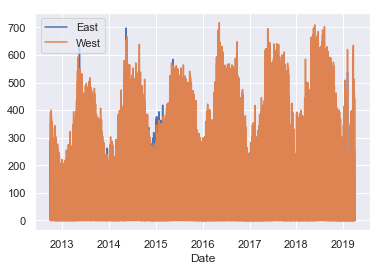

In [ ]:
data.plot()

This is very heard to read because there is too much data at too fine of a resolution (the data spans 7 years at a granularity of hours). We need to reduce the amount of data by combining all the data into granularity of weeks. We do this with resampling

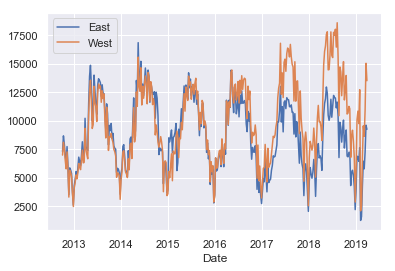

In [ ]:
weekly = data.resample('W').sum()
weekly.plot()

Resampling is kind of like groupby, but the way of splitting the data is different. Instead of splitting data into groups by the same value, it transforms the dates to a certain new frequency and then combines all of the data that belongs to the same week in a specified way.

This is made more clear when you actually look at the result of a groupby like below.

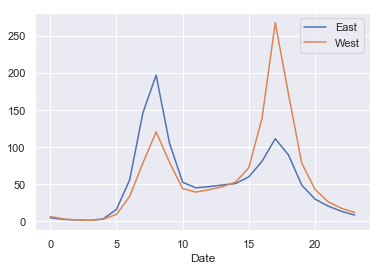

In [ ]:
by_time = data.groupby(data.index.hour).mean()
by_time.plot()

I looked into the data after lecture and the data looks correct. There are more people heading northbound on the east side of the bridge in the morning and more people heading southbound on the west side of the bridge in the evening. You can find the whole dataset [here](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).